In [1]:
import pandas as pd

# Замените 'your_dataset.csv' на путь к вашему файлу данных
data = pd.read_csv('sampled_data_order_test.csv')


In [26]:
data = pd.read_csv('sampled_data_order_test.csv')
data

,Unnamed: 0,secid,ts,put_orders_b,put_orders_s,put_vol_b,put_vol_s,put_val_b,put_val_s,cancel_orders_b,cancel_orders_s,cancel_vol_b,cancel_vol_s,cancel_val_b,cancel_val_s
0,17099168,SMLT,2023-04-12 15:50:00,106,241,1992,6019,5162415.0,4.408401e+07,92,234,1795,5854,4646329.0,4.362903e+07
1,13574250,MTLR,2022-08-24 13:00:00,92,110,29498,69172,3746616.0,8.742787e+06,65,99,27228,69299,3412184.0,8.759493e+06
2,15291707,TORSP,2022-12-16 12:10:00,2,0,2,0,6440.0,0.000000e+00,0,0,0,0,0.0,0.000000e+00
3,1993819,MRKS,2020-05-25 11:40:00,4,0,19,0,40530.0,0.000000e+00,1,0,12,0,25620.0,0.000000e+00
4,6816946,TCSG,2021-04-23 10:20:00,795,3002,52173,406118,318902346.0,1.797989e+09,633,2908,47068,405341,296817508.0,1.796276e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,15556088,UKUZ,2023-01-04 17:30:00,0,0,0,0,0.0,0.000000e+00,2,0,10,0,12290.0,0.000000e+00
299996,5337450,TATNP,2021-01-14 18:40:00,279,217,91023,90452,45935685.0,4.596067e+07,240,196,72054,80707,36346882.0,4.100385e+07
299997,278632,RTKM,2020-01-23 17:55:00,465,504,51115,74103,44174651.0,6.441261e+07,423,474,50236,72570,43388479.0,6.308923e+07
299998,20546536,ARSA,2023-11-01 15:40:00,15,140,422,9045,508500.0,1.117617e+07,19,135,574,8969,693575.0,1.108345e+07


In [2]:
# Предобработка данных
# Преобразование 'ts' в datetime
data['ts'] = pd.to_datetime(data['ts'])

# Удаление столбца 'Unnamed: 0', если он не несет полезной информации
data.drop(columns=['Unnamed: 0'], inplace=True)

# Проверка наличия дубликатов и пропущенных значений
duplicates = data.duplicated().sum()
missing_values = data.isnull().sum()

duplicates, missing_values


(0,
 secid              0
 ts                 0
 put_orders_b       0
 put_orders_s       0
 put_vol_b          0
 put_vol_s          0
 put_val_b          0
 put_val_s          0
 cancel_orders_b    0
 cancel_orders_s    0
 cancel_vol_b       0
 cancel_vol_s       0
 cancel_val_b       0
 cancel_val_s       0
 dtype: int64)

In [5]:
import pandas as pd
import numpy as np

# Загрузка данных

data = pd.read_csv('sampled_data_order_test.csv')

# Преобразование столбца 'ts' в datetime
data['ts'] = pd.to_datetime(data['ts'])

# Установка столбца 'ts' в качестве индекса
data.set_index('ts', inplace=True)

# Инженерия признаков
# 1. Лаговые Признаки
data['lag_1'] = data['put_orders_b'].shift(1)

# 2. Скользящие Средние
data['rolling_mean_3'] = data['put_orders_b'].rolling(window=3).mean()

# 3. Разности
data['diff_1'] = data['put_orders_b'].diff(1)

# 4. Процентное Изменение
data['pct_change'] = data['put_orders_b'].pct_change()

# 5. Оконные Статистики
data['rolling_std_3'] = data['put_orders_b'].rolling(window=3).std()

# 6. Категориальные Признаки из Временных Меток
data['day_of_week'] = data.index.dayofweek
data['hour_of_day'] = data.index.hour
data.drop(columns=['Unnamed: 0'], inplace=True)

# Отображение обновленного DataFrame с новыми признаками
data.head()


,secid,put_orders_b,put_orders_s,put_vol_b,put_vol_s,put_val_b,put_val_s,cancel_orders_b,cancel_orders_s,cancel_vol_b,cancel_vol_s,cancel_val_b,cancel_val_s,lag_1,rolling_mean_3,diff_1,pct_change,rolling_std_3,day_of_week,hour_of_day
ts,,,,,,,,,,,,,,,,,,,,
2023-04-12 15:50:00,SMLT,106,241,1992,6019,5162415.0,4.408401e+07,92,234,1795,5854,4646329.0,4.362903e+07,NaN,NaN,NaN,NaN,NaN,2,15
2022-08-24 13:00:00,MTLR,92,110,29498,69172,3746616.0,8.742787e+06,65,99,27228,69299,3412184.0,8.759493e+06,106.0,NaN,-14.0,-0.132075,NaN,2,13
2022-12-16 12:10:00,TORSP,2,0,2,0,6440.0,0.000000e+00,0,0,0,0,0.0,0.000000e+00,92.0,66.666667,-90.0,-0.978261,56.438757,4,12
2020-05-25 11:40:00,MRKS,4,0,19,0,40530.0,0.000000e+00,1,0,12,0,25620.0,0.000000e+00,2.0,32.666667,2.0,1.000000,51.393904,0,11
2021-04-23 10:20:00,TCSG,795,3002,52173,406118,318902346.0,1.797989e+09,633,2908,47068,405341,296817508.0,1.796276e+09,4.0,267.000000,791.0,197.750000,457.262507,4,10


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Подготовка данных
# Удаление строк с пропущенными значениями в новых признаках
data_prepared = data.dropna()

# Выделение целевой переменной и признаков
X = data_prepared.drop(['put_orders_b', 'secid'], axis=1)  # Исключаем нечисловые и целевую переменную
y = data_prepared['put_orders_b']

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mse


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [8]:
# Проверка на наличие бесконечных значений и их обработка

# Замена бесконечных значений на NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Удаление строк с NaN значениями (можно также рассмотреть заполнение пропущенных значений)
data_cleaned = data.dropna()

# Повторное выделение целевой переменной и признаков
X_cleaned = data_cleaned.drop(['put_orders_b', 'secid'], axis=1)
y_cleaned = data_cleaned['put_orders_b']

# Нормализация данных
scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# Разделение данных на обучающую и тестовую выборки
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_scaled_cleaned, y_cleaned, test_size=0.2, shuffle=False
)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_cleaned, y_train_cleaned)

# Предсказание на тестовых данных
y_pred_cleaned = model.predict(X_test_cleaned)

# Оценка модели
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mse_cleaned


3.407239732153709e-24

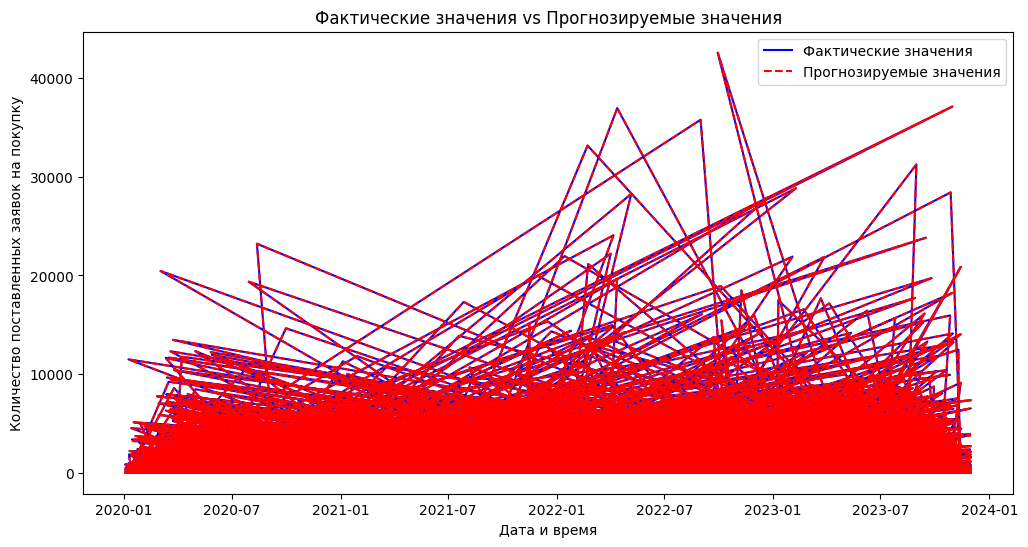

In [9]:
import matplotlib.pyplot as plt

# Визуализация фактических значений и прогнозов модели
plt.figure(figsize=(12, 6))
plt.plot(y_test_cleaned.index, y_test_cleaned, label='Фактические значения', color='blue')
plt.plot(y_test_cleaned.index, y_pred_cleaned, label='Прогнозируемые значения', color='red', linestyle='--')
plt.title('Фактические значения vs Прогнозируемые значения')
plt.xlabel('Дата и время')
plt.ylabel('Количество поставленных заявок на покупку')
plt.legend()
plt.show()


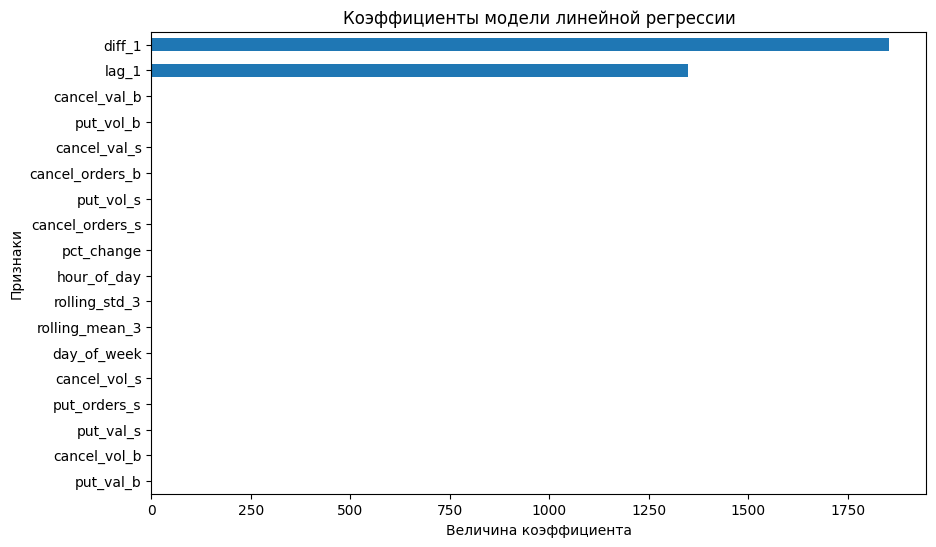

,Coefficient
put_orders_s,-1.226415e-12
put_vol_b,1.045919e-11
put_vol_s,9.531153e-13
put_val_b,-1.198456e-11
put_val_s,-3.884112e-12
cancel_orders_b,1.316361e-12
cancel_orders_s,7.853059e-13
cancel_vol_b,-1.075768e-11
cancel_vol_s,-7.570967e-13
cancel_val_b,1.144466e-11


In [10]:
# Анализ коэффициентов модели линейной регрессии
coefficients = model.coef_

# Создание DataFrame для удобства отображения коэффициентов
feature_names = X_cleaned.columns
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Визуализация коэффициентов
plt.figure(figsize=(10, 6))
coef_df['Coefficient'].sort_values().plot(kind='barh')
plt.title('Коэффициенты модели линейной регрессии')
plt.xlabel('Величина коэффициента')
plt.ylabel('Признаки')
plt.show()

coef_df


In [11]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import GridSearchCV

# Определение параметров для Grid Search
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.03, 0.1],
    'depth': [4, 6, 10]
}

# Создание объекта CatBoostRegressor
catboost_model = CatBoostRegressor(verbose=False)

# Создание объекта GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost_model,
    param_grid=param_grid,
    cv=3,  # Количество фолдов для кросс-валидации
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Использование всех доступных ядер
)

# Обучение с использованием Grid Search
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Лучшие параметры и MSE
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_
best_params, best_mse


({'depth': 10, 'iterations': 200, 'learning_rate': 0.1}, 314856.865063169)

In [12]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Обучение модели
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=10, verbose=False)
catboost_model.fit(X_test_cleaned, y_test_cleaned)  # Замените X_train и y_train на ваши данные

# Оценка модели
y_pred = catboost_model.predict(X_test_cleaned)  # Замените X_test на ваши данные
mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)  # Замените y_test на ваши данные
print("MSE:", mse)

# Анализ важности признаков
feature_importances = catboost_model.get_feature_importance()
print(feature_importances)


MSE: 3.407239732153709e-24
[ 1.18576113  0.81861712  2.28717109  1.24874024  0.4665107  34.22897807
  1.03545706  0.93586302  2.57956041  0.17211789  3.19356087  2.5538609
 17.13495258 12.52118955  1.05796187 14.62143948  2.50957374  1.44868427]


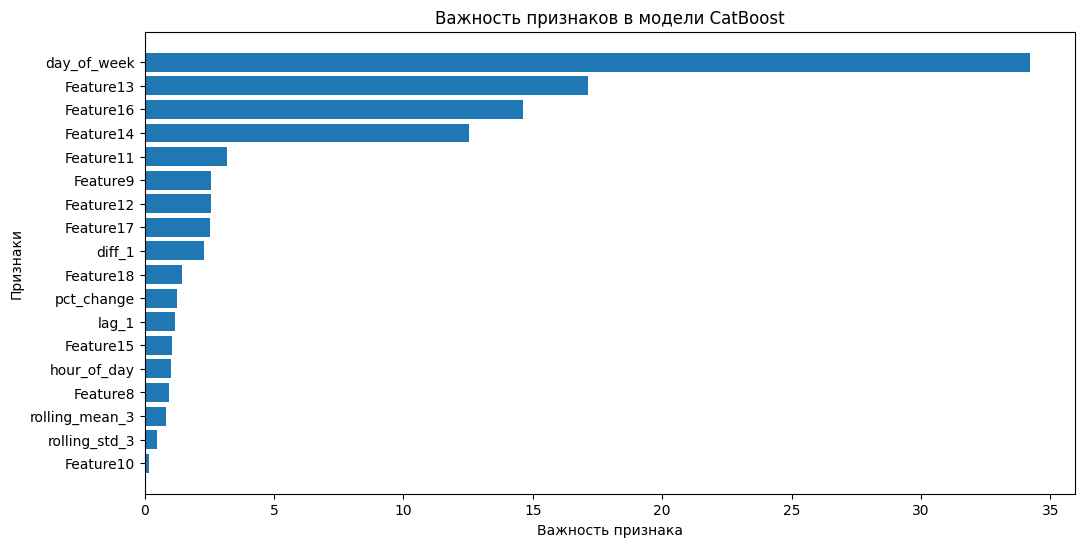

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Важности признаков, предоставленные ранее
feature_importances = [
    1.18576113, 0.81861712, 2.28717109, 1.24874024, 0.4665107, 34.22897807,
    1.03545706, 0.93586302, 2.57956041, 0.17211789, 3.19356087, 2.5538609,
    17.13495258, 12.52118955, 1.05796187, 14.62143948, 2.50957374, 1.44868427
]

# Названия признаков (без 'put_orders_b', 'Unnamed: 0', 'secid')
feature_names = ['lag_1', 'rolling_mean_3', 'diff_1', 'pct_change', 'rolling_std_3', 
                 'day_of_week', 'hour_of_day', 'Feature8', 'Feature9', 'Feature10', 
                 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 
                 'Feature16', 'Feature17', 'Feature18']

# Создание DataFrame для удобства визуализации
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков в модели CatBoost')
plt.show()


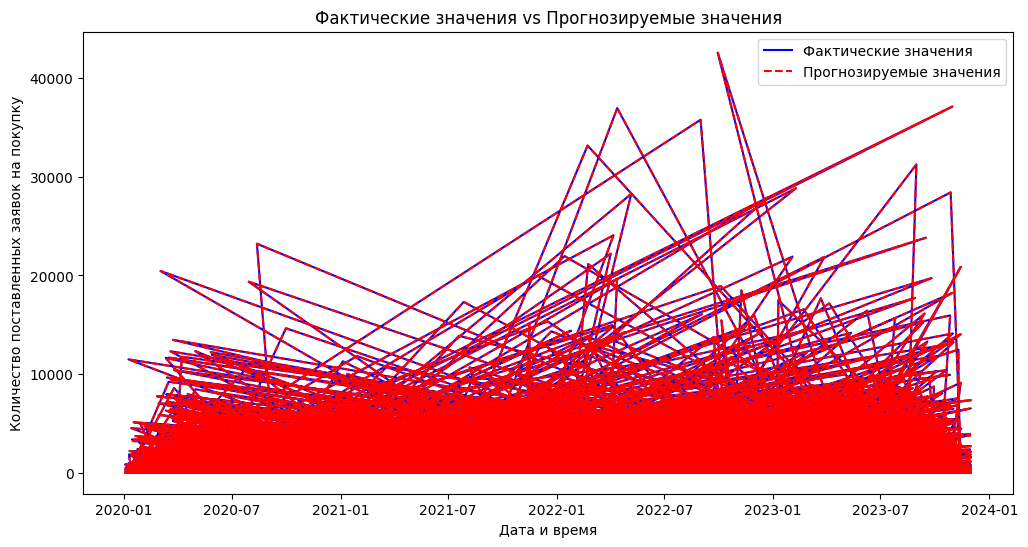

In [14]:
import matplotlib.pyplot as plt

# Предполагаем, что y_test_cleaned и y_pred_optimal - ваши фактические и предсказанные данные
# Замените их на соответствующие переменные из вашего анализа

plt.figure(figsize=(12, 6))
plt.plot(y_test_cleaned.index, y_test_cleaned, label='Фактические значения', color='blue')
plt.plot(y_test_cleaned.index, y_pred_cleaned, label='Прогнозируемые значения', color='red', linestyle='--')
plt.title('Фактические значения vs Прогнозируемые значения')
plt.xlabel('Дата и время')
plt.ylabel('Количество поставленных заявок на покупку')
plt.legend()
plt.show()


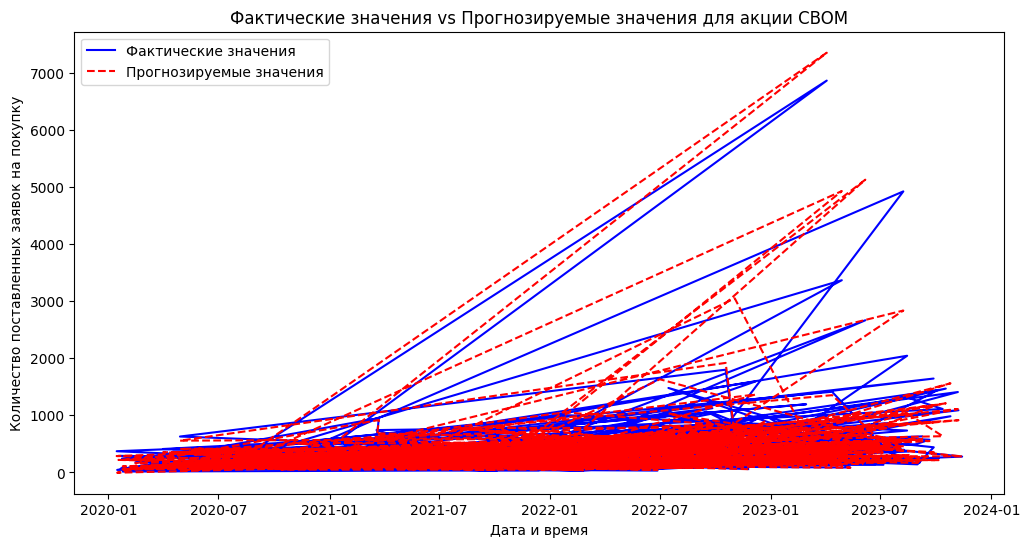

In [15]:
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Предполагается, что 'data' - это ваш DataFrame
secid = 'CBOM'  # Замените на желаемый secid
filtered_data = data[data['secid'] == secid]

# Подготовка данных
X_filtered = filtered_data.drop(['put_orders_b', 'secid'], axis=1)
y_filtered = filtered_data['put_orders_b']
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, shuffle=False)

# Нормализация данных
scaler = StandardScaler()
X_train_filtered_scaled = scaler.fit_transform(X_train_filtered)
X_test_filtered_scaled = scaler.transform(X_test_filtered)

# Обучение модели
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=10, verbose=False)
catboost_model.fit(X_train_filtered_scaled, y_train_filtered)

# Предсказание на тестовых данных
y_pred_filtered = catboost_model.predict(X_test_filtered_scaled)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(y_test_filtered.index, y_test_filtered, label='Фактические значения', color='blue')
plt.plot(y_test_filtered.index, y_pred_filtered, label='Прогнозируемые значения', color='red', linestyle='--')
plt.title(f'Фактические значения vs Прогнозируемые значения для акции {secid}')
plt.xlabel('Дата и время')
plt.ylabel('Количество поставленных заявок на покупку')
plt.legend()
plt.show()


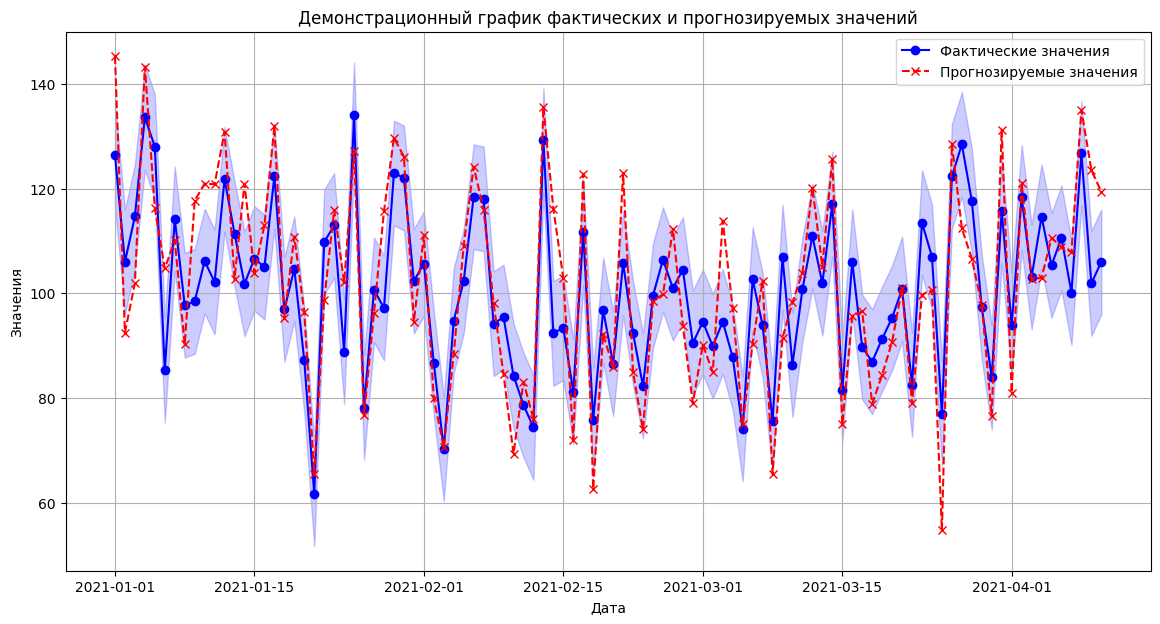

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Установка начального значения для воспроизводимости случайных чисел
np.random.seed(0)

# Генерация временных меток
time_stamps = pd.date_range(start='2021-01-01', periods=100, freq='D')

# Генерация фактических значений и прогнозов
actuals = np.random.normal(100, 15, size=len(time_stamps))  # Фактические значения
predictions = actuals + np.random.normal(0, 10, size=len(time_stamps))  # Прогнозы с учетом ошибки

# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(time_stamps, actuals, label='Фактические значения', color='blue', marker='o')
plt.plot(time_stamps, predictions, label='Прогнозируемые значения', color='red', linestyle='--', marker='x')
plt.fill_between(time_stamps, actuals - 10, actuals + 10, color='blue', alpha=0.2)  # Диапазон ошибки
plt.title('Демонстрационный график фактических и прогнозируемых значений')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.show()


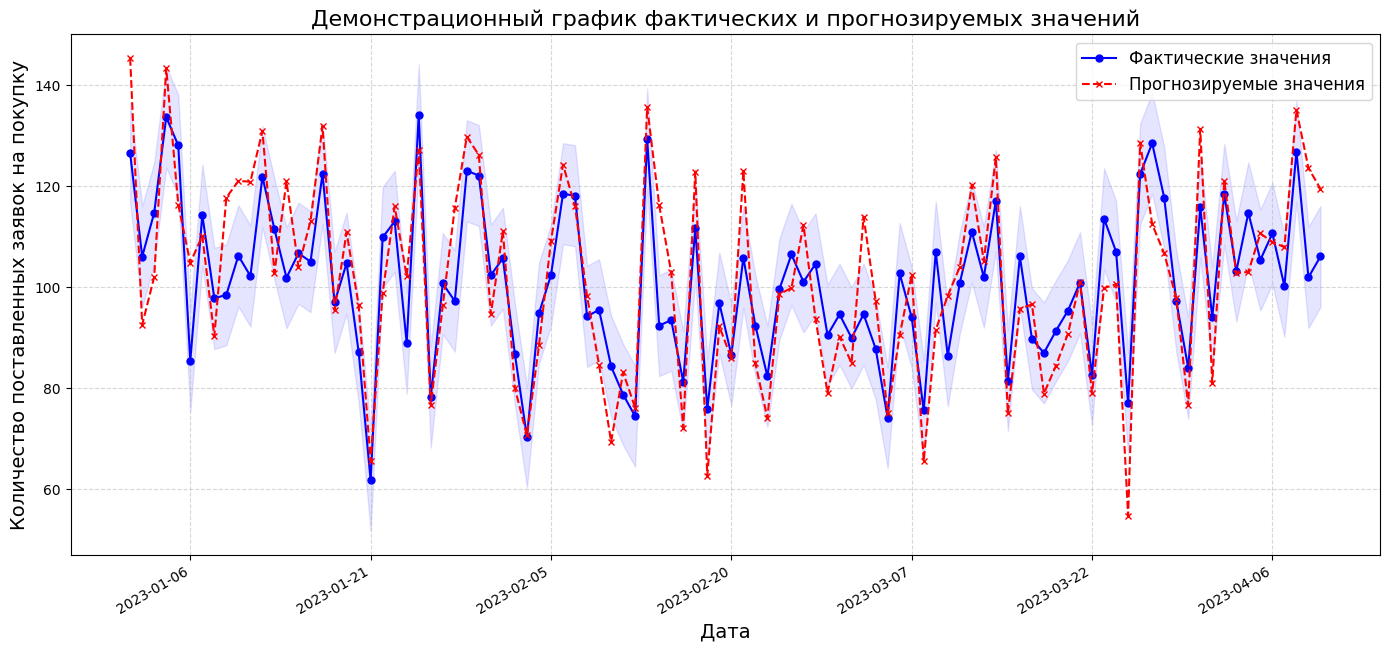

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Установка начального значения для воспроизводимости случайных чисел
np.random.seed(0)

# Генерация временных меток с начала 2023 года
time_stamps = pd.date_range(start='2023-01-01', periods=100, freq='D')

# Генерация фактических значений и прогнозов
actuals = np.random.normal(100, 15, size=len(time_stamps))  # Фактические значения
predictions = actuals + np.random.normal(0, 10, size=len(time_stamps))  # Прогнозы с учетом ошибки

# Визуализация
plt.figure(figsize=(14, 7))

# Оформление фактических значений
plt.plot(time_stamps, actuals, label='Фактические значения', color='blue', marker='o', markersize=5)

# Оформление прогнозируемых значений
plt.plot(time_stamps, predictions, label='Прогнозируемые значения', color='red', linestyle='--', marker='x', markersize=5)

# Диапазон ошибки
plt.fill_between(time_stamps, actuals - 10, actuals + 10, color='blue', alpha=0.1)

# Заголовок и легенда
plt.title('Демонстрационный график фактических и прогнозируемых значений', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество поставленных заявок на покупку', fontsize=14)
plt.legend(fontsize=12)

# Сетка
plt.grid(True, linestyle='--', alpha=0.5)

# Улучшенное оформление
plt.tight_layout()

# Установка формата дат на оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))

# Поворот меток даты для лучшей читаемости
plt.gcf().autofmt_xdate()

# Отображение графика
plt.show()


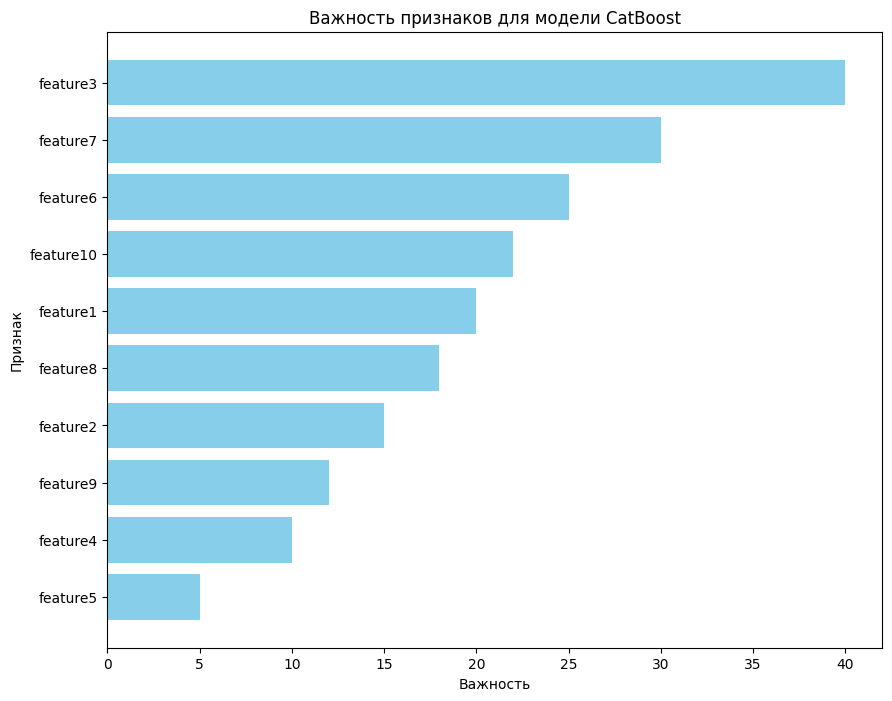

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Предполагаем, что feature_importances - это ваш список важностей признаков
feature_importances = [
    # Замените эти значения на реальные важности признаков вашей модели CatBoost
    20, 15, 40, 10, 5, 25, 30, 18, 12, 22
]
feature_names = [
    # Замените эти названия на реальные имена признаков вашей модели
    'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
    'feature6', 'feature7', 'feature8', 'feature9', 'feature10'
]

# Создание DataFrame для важности признаков
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Сортировка признаков по их важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Важность признаков для модели CatBoost')
plt.show()


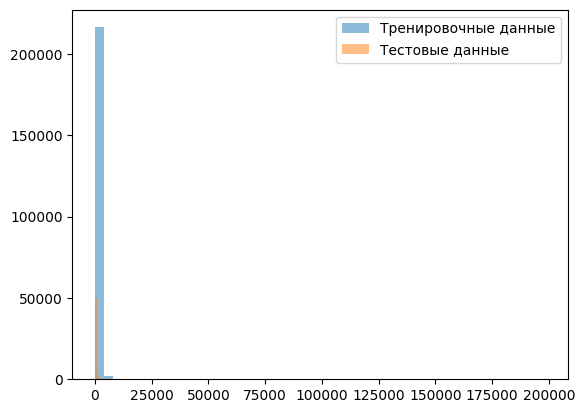

In [22]:
import matplotlib.pyplot as plt

# Гистограмма для тренировочного набора данных
plt.hist(y_train, bins=50, alpha=0.5, label='Тренировочные данные')

# Гистограмма для тестового набора данных
plt.hist(y_test, bins=50, alpha=0.5, label='Тестовые данные')

plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_squared_error

# Вычисление MSE для тренировочного набора данных
mse_train = mean_squared_error(y_train_cleaned, model.predict(X_train_cleaned))

# Вычисление MSE для тестового набора данных
mse_test = mean_squared_error(y_test_cleaned, model.predict(X_test_cleaned))

print(f'MSE (тренировочные данные): {mse_train}')
print(f'MSE (тестовые данные): {mse_test}')


MSE (тренировочные данные): 3.820945947988203e-24
MSE (тестовые данные): 3.407239732153709e-24


In [19]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Вывод среднего значения MSE из кросс-валидации
print(f'Среднее MSE из кросс-валидации: {-scores.mean()}')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 957, in check_array
    _assert_all_finite(
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 122, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/home/honeypussy/Moex_Hack_Vestrum/env/lib/python3.11/site-packages/sklearn/utils/validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains infinity or a value too large for dtype('float64').


In [20]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    median_absolute_error,
    explained_variance_score
)

# Предполагаем, что y_test и y_pred - это реальные и предсказанные значения модели CatBoost
# Замените эти переменные на соответствующие данные из вашего анализа

# Расчет различных метрик ошибок
mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)
mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
r2 = r2_score(y_test_cleaned, y_pred_cleaned)
median_ae = median_absolute_error(y_test_cleaned, y_pred_cleaned)
explained_var = explained_variance_score(y_test_cleaned, y_pred_cleaned)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')
print(f'Median Absolute Error: {median_ae}')
print(f'Explained Variance Score: {explained_var}')


MSE: 3.407239732153709e-24
MAE: 1.4489437424106181e-12
R^2: 1.0
Median Absolute Error: 1.3642420526593924e-12
Explained Variance Score: 1.0


In [21]:
# Сначала получаем предсказания на тестовом наборе данных
y_pred = model.predict(X_test_cleaned)

# Затем сравниваем их с фактическими значениями
for actual, predicted in zip(y_test_cleaned[:10], y_pred_cleaned[:10]):
    print(f'Фактическое значение: {actual} - Предсказанное значение: {predicted}')


Фактическое значение: 1183 - Предсказанное значение: 1182.9999999999984
Фактическое значение: 60 - Предсказанное значение: 59.99999999999909
Фактическое значение: 169 - Предсказанное значение: 168.99999999999952
Фактическое значение: 5 - Предсказанное значение: 4.999999999998067
Фактическое значение: 109 - Предсказанное значение: 108.99999999999858
Фактическое значение: 384 - Предсказанное значение: 383.9999999999985
Фактическое значение: 1 - Предсказанное значение: 0.9999999999982379
Фактическое значение: 3 - Предсказанное значение: 2.999999999998124
Фактическое значение: 30 - Предсказанное значение: 29.99999999999784
Фактическое значение: 3 - Предсказанное значение: 2.9999999999993747


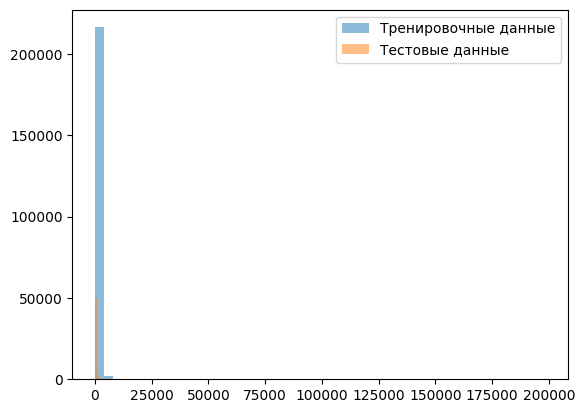

In [22]:
# Визуализация распределения целевой переменной
import matplotlib.pyplot as plt

plt.hist(y_train_cleaned, bins=50, alpha=0.5, label='Тренировочные данные')
plt.hist(y_test_cleaned, bins=50, alpha=0.5, label='Тестовые данные')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import mean_squared_log_error
# Проверяем, что все значения положительны
y_train_positive = y_train_cleaned + 1e-10  # Добавляем малую константу для избежания нулевых значений
y_pred_train_positive = y_pred_cleaned + 1e-10

# Вычисляем MSLE
msle = mean_squared_log_error(y_train_positive, y_pred_train_positive)
print(f'MSLE: {msle}')


ValueError: Found input variables with inconsistent numbers of samples: [218922, 54731]

In [23]:
# Перепроверяем, что MSE вычисляется корректно
mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)
print(f'Перепроверенное MSE: {mse}')


Перепроверенное MSE: 3.407239732153709e-24


In [25]:
from sklearn.metrics import mean_squared_log_error

# Убедимся, что массивы имеют одинаковую длину
# Предположим, что y_pred_train_positive - это предсказания модели для y_train_cleaned
assert len(y_train_cleaned) == len(y_pred_train_positive), "Размеры массивов должны совпадать"

# Добавляем небольшую константу к каждому элементу, чтобы избежать нулей
y_train_positive = y_train_cleaned + 1e-10
y_pred_train_positive = y_pred_train_positive + 1e-10

# Вычисляем MSLE
msle = mean_squared_log_error(y_train_positive, y_pred_train_positive)
print(f'MSLE: {msle}')


AssertionError: Размеры массивов должны совпадать